# Evaluating Model Performance and Overfitting

## Evaluation of Models

Its nearly impossible to evaluate how your model is performing by seeing resiudual for each  data point seperately
So we have to have aggregate metrics which can be used to evaluate models and even compare different models

### Continous(Numerical Prediction) 

<b>MAE(Mean Absolute Error)</b>

Absolute value of residual of each datapoint is taken and averaged across using number of datapoints.
 

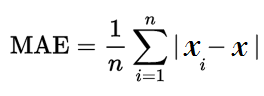

<b>MSE(Mean Square Error)</b>

The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.Please note that the unit of mean sqaure error is not same as the original Y

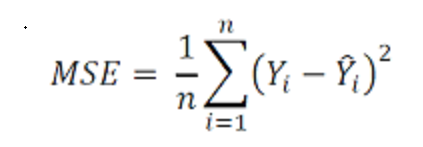

<b>RMSE(Root Mean Square Error)</b>

Square root of mean square error. The advantage of RMSE over MSE is that RMSE same asthe unit of Y.Should be used over other metrics when u want to give a higher weigtage to larger erros(such as erros due to outliers)xx

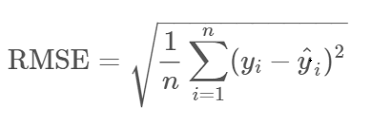

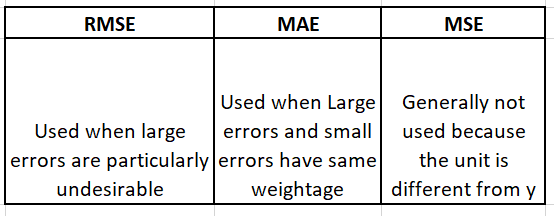

In [13]:
import sklearn.metrics as metrics
import numpy as np
y = np.array([-3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
yhat = np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])
print("mae:", metrics.mean_absolute_error(y, yhat))
print("mse:",  metrics.mean_squared_error(y, yhat))
print("rmse:", np.sqrt(mse)) 

mae: 0.5833333333333334
mse: 0.75
rmse: 0.8660254037844386


### Classification Error Metrics

Lets consider a confusion matrix. Confusion matrix can be  used to evaluate the performance of a classification model 

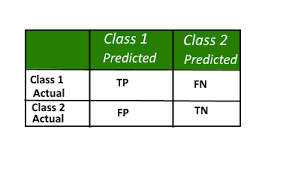

In [27]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 0, 0, 1,1,0,1]
y_pred = [0, 1, 0, 1, 0, 1,0,1,0]
confusion_matrix(y_true, y_pred)

array([[1, 3],
       [4, 1]], dtype=int64)

<b>Accuracy :</b> (TP+TN)/(TP+FN+FP+TN)<br></br>

This metric can be used to predict overall accuracy of model,when it is equally significant to predict both negative and positive event correctly

In [28]:
from sklearn.metrics import accuracy_score
y_true = [1, 0, 1, 0, 0, 1,1,0,1]
y_pred = [0, 1, 0, 1, 0, 1,0,1,0]
accuracy_score(y_true, y_pred)


0.2222222222222222

<b>Precision:</b> TP/(TP+FP).

Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Precision is a good measure to determine, when the costs of False Positive is high. 

For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

In [29]:
from sklearn.metrics import precision_score
y_true = [1, 0, 1, 0, 0, 1,1,0,1]
y_pred = [0, 1, 0, 1, 0, 1,0,1,0]
precision_score(y_true, y_pred)


0.25

<b>Recall, Sensitivity, True Positive Rate :</b>TP/(TP+FN)
.
Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

In [30]:
from sklearn.metrics import recall_score
y_true = [1, 0, 1, 0, 0, 1,1,0,1]
y_pred = [0, 1, 0, 1, 0, 1,0,1,0]
recall_score(y_true, y_pred)

0.2

<b>Specifity, True Negative Rate:</b>TN/(TN+FP)

<b>F1 Score:</b> 2.Precison.Recall/(Precison+Recall).

F1 Score is needed when you want to seek a balance between Precision and Recall.

Accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) 

Thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [31]:
from sklearn.metrics import f1_score
y_true = [1, 0, 1, 0, 0, 1,1,0,1]
y_pred = [0, 1, 0, 1, 0, 1,0,1,0]
f1_score(y_true, y_pred)

0.22222222222222224

## Bias & Variance 

The total error is composed of Bias, Variance and a random irreducible error.Bias and Variance can be managed.If the model performance on training and testing
data sets is inconsistent, it indicates a problem
either with Bias or Variance.

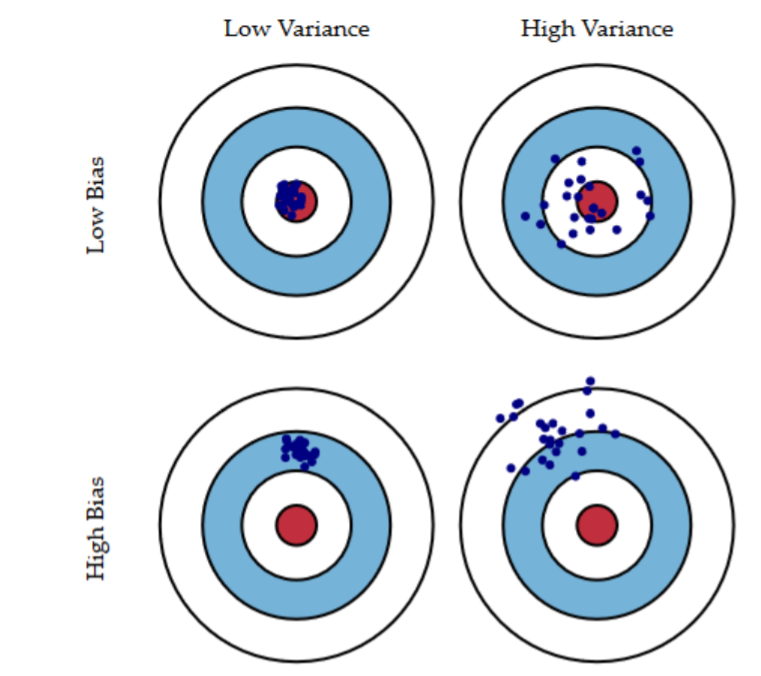

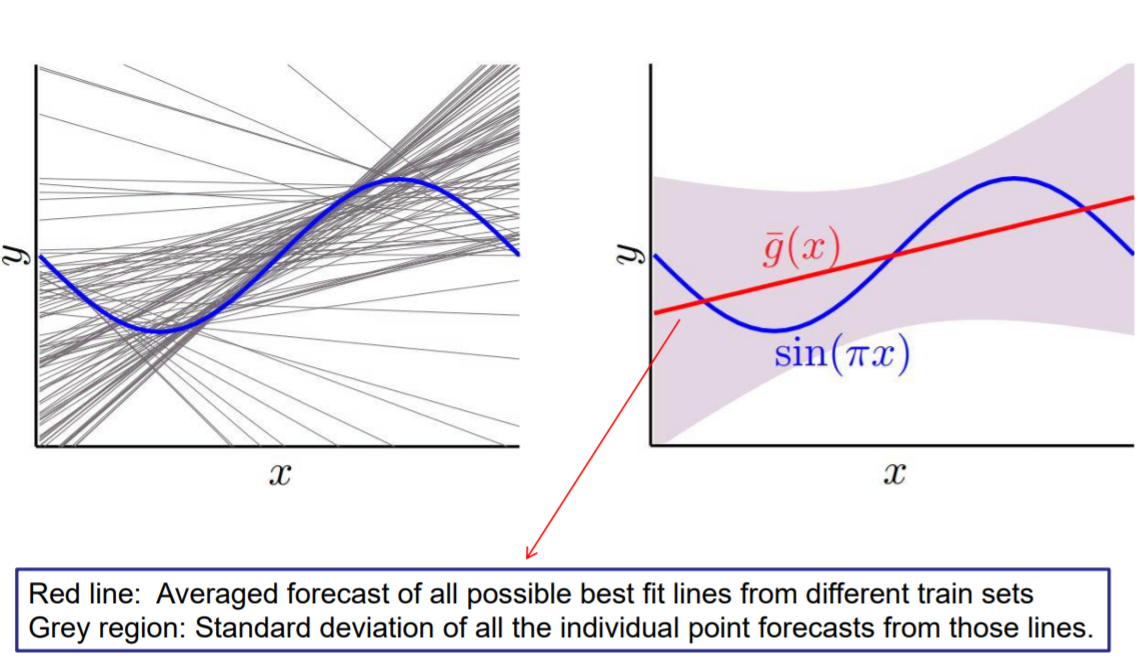

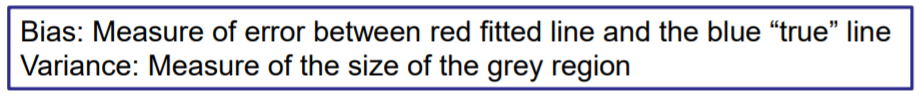

Bias =0.21
<br></br>Variance=1.69

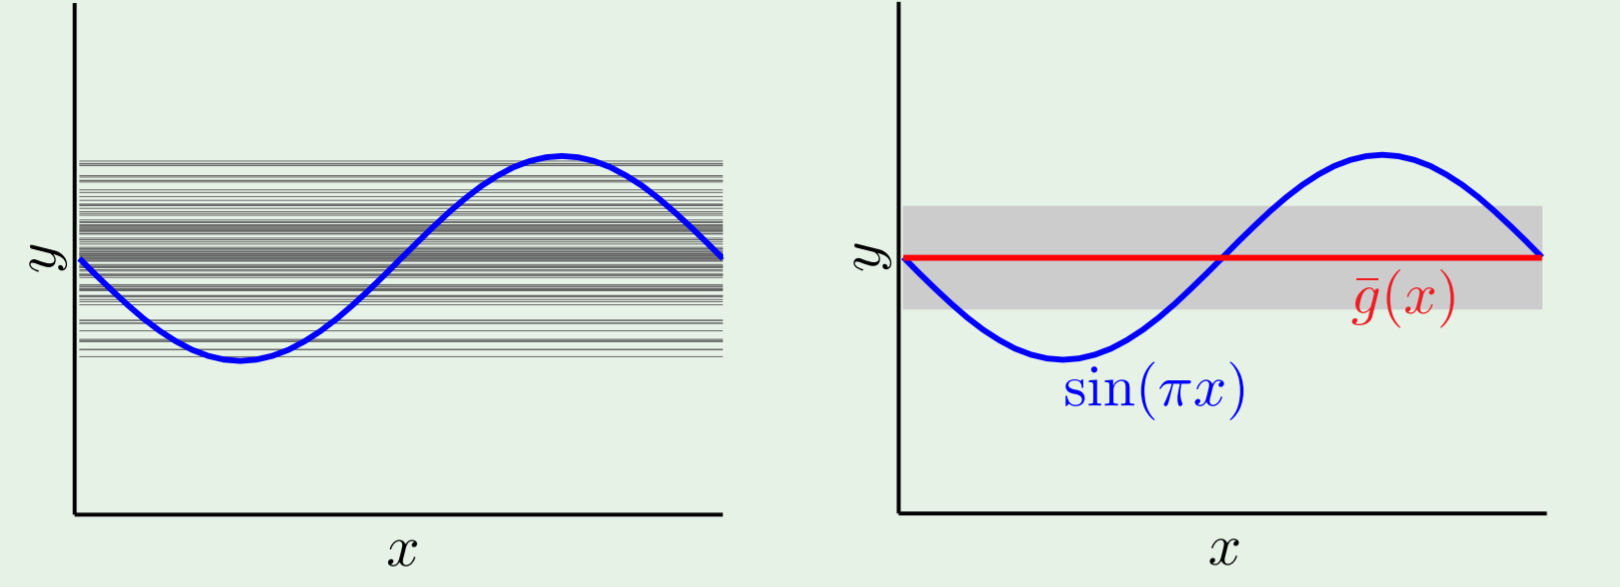

Bias=0.5 
<br></br>Variance=0.25

## Underfitting

Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.
The underfit model generally have high bias

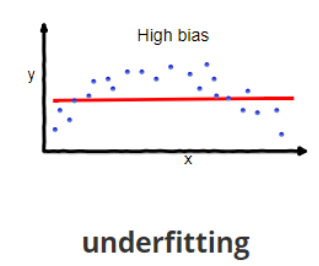



## Overfitting

Overfitting refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

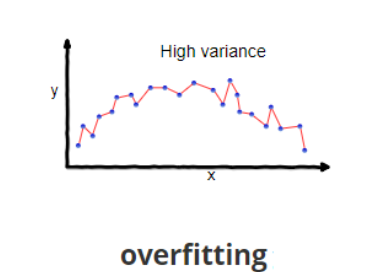

## Good Fit in Machine Learning

Ideally, you want to select a model at the sweet spot between underfitting and overfitting.
Over time, as the algorithm learns, the error for the model on the training data goes down and so does the error on the test dataset. If we train for too long, the performance on the training dataset may continue to decrease because the model is overfitting and learning the irrelevant detail and noise in the training dataset. At the same time the error for the test set starts to rise again as the model’s ability to generalize decreases.

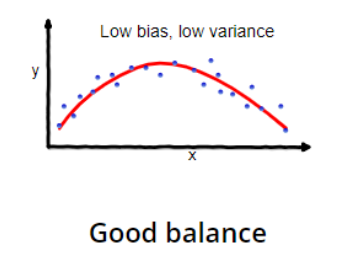

## Bias, Variance and Underfitting, Overfitting

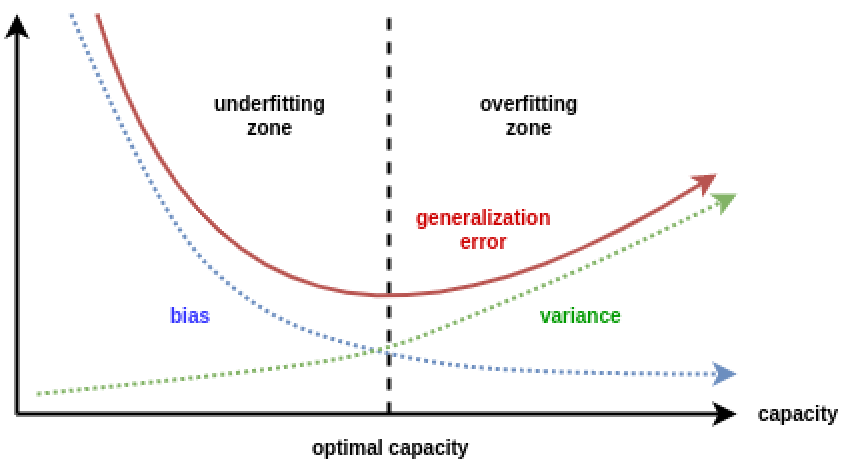

## Evaluating Underfitting and Overfitting

Overfitting is such a problem because the evaluation of machine learning algorithms on training data is different from the evaluation we actually care the most about, namely how well the algorithm performs on unseen data.

There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting: <br></br>
1. Hold back a validation dataset.
2. Use a resampling technique to estimate model accuracy.For example  Cross Validation<br></br> 


### Validation Set Approach

In this part of data is used for training and part of it is used for validation. Generally a 70% and 30% approach is used 

<b>Advantages</b> :Evaluating  the performance on one set of unseen data
<br></br><b>Disadvantages</b>:
<br></br>a. Only one estimate of the model’s accuracy is obtained
<br></br>b. Since you reserved some part of the original dataset for testing, you induced a significant amount of bias into the whole process

### Leave-One-Out- Cross Validation (LOOCV)

Only one data point is held as a holdout and other all points are used for training. This is repeated for each point till each point apperas once as test

<b>Advantage</b>:Negligible bias inherent in the testing process
<br></br><b>Disadvantage</b>:Significant amount of variance is induced as a single point is only selected for testing

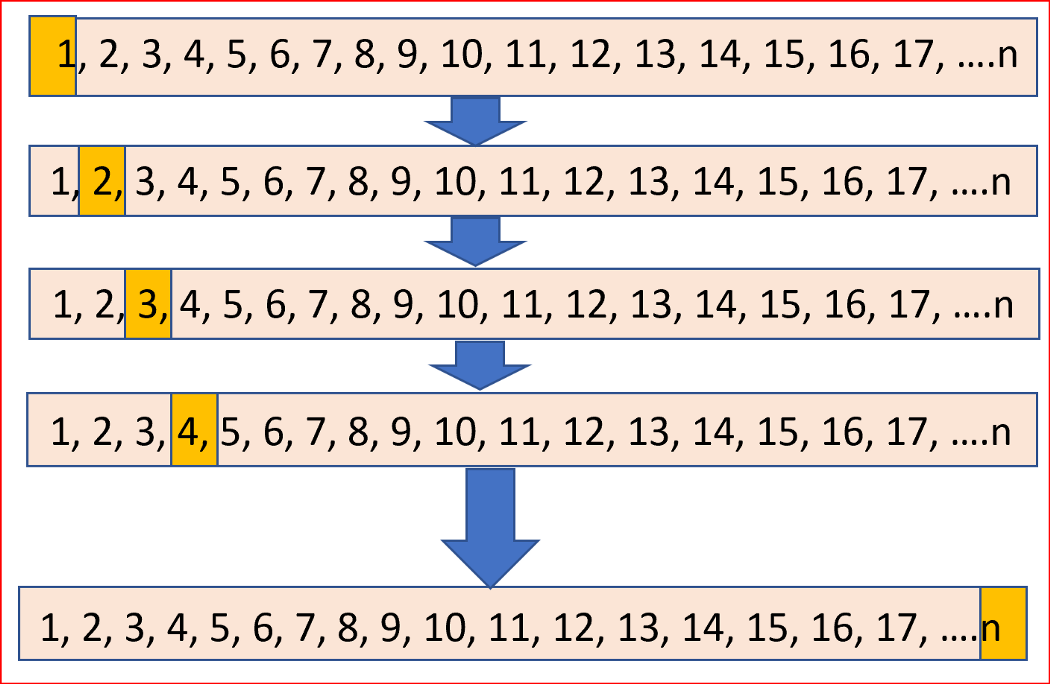

### K-fold Cross Validation

This is a brilliant way of achieving the bias-variance tradeoff in your testing process AND ensuring that your model itself has low bias and low variance. The testing procedure can be summarized as follows (where k is an integer) –
i. Divide your dataset randomly into k different parts.

ii. Repeat k times:

a. Choose a part out of the k available ones (one that hasn’t been chosen before, obviously).

b. Use the other k-1 parts together for training your model.

 Use the part that was held-out in step ii.a., for testing. This will give you one of the k estimates of your model’s error.

 Lets take the scenario of 3-Fold cross validation(K=3). 
 Here, the data set is split into 3 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 3 folds have been used as the testing set.

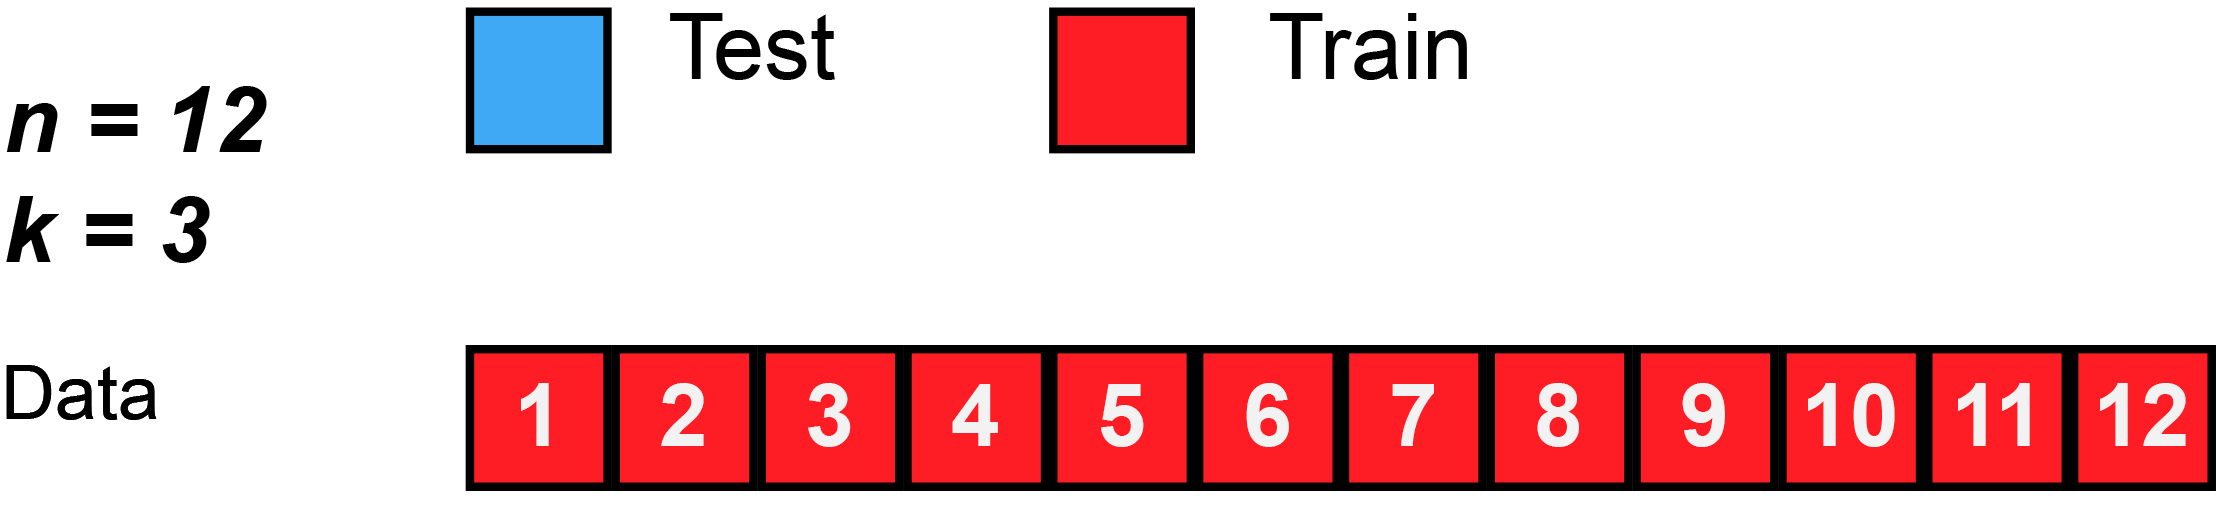b

Choosing a good value of ‘k‘ ensures that your testing procedure gives you the best possible estimate of how well your model works. Choose a value too small, and you will drift towards the extremity of using the Validation Set Approach(biased testing). Choose a value too large, and it will be more like LOOCV (too much of variance in the testing procedure, and computationally intensive). Usually, a value between 5-10 is used in practical Machine Learning scenarios.

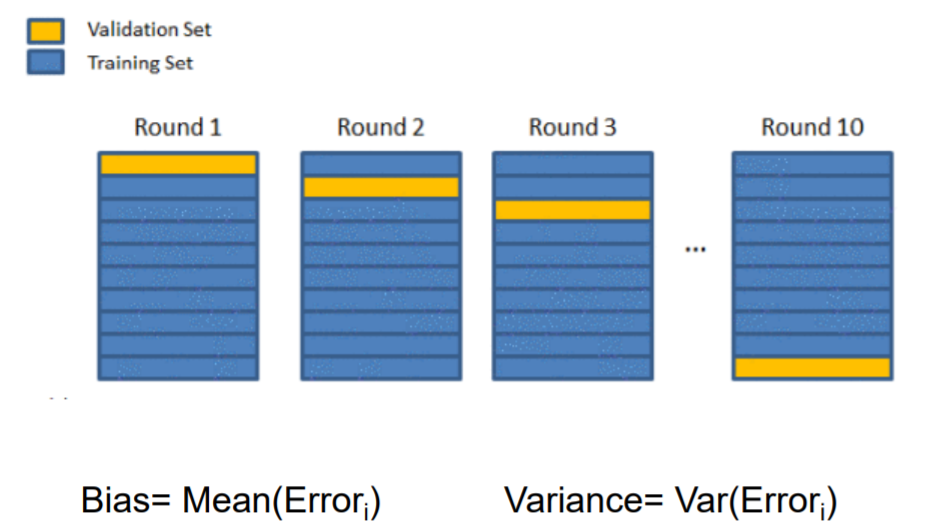

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
X, y = load_iris(return_X_y=True)
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
print(clf.predict(X[:2, :]))

print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))


C:\Users\sgarg133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0 0]
[[8.72748391e-01 1.27251609e-01 5.50605905e-14]
 [6.76642825e-01 3.23357175e-01 2.11651398e-13]]
0.9266666666666666


In [33]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
boston_obj = load_boston()
data, price = boston_obj.data, boston_obj.target
data[:5, :]
price[:5]
data_train, data_test, price_train, price_test = train_test_split(data, price)
data_train[:5, :]
price_train[:5]

array([27.1, 28. , 21.5, 21.2,  9.6])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
ols1 = LinearRegression()
ols1.fit(data_train, price_train)    # Fitting a linear model
ols1.predict([[    # An example prediction
    1,      # Per capita crime rate
    25,     # Proportion of land zoned for large homes
    5,      # Proportion of land zoned for non-retail business
    1,      # Tract bounds the Charles River
    0.3,    # NOX concentration
    10,     # Average number of rooms per dwelling
    2,      # Proportion of owner-occupied units built prior to 1940
    10,     # Weighted distance to employment centers
    3,      # Index for highway accessibility
    400,    # Tax rate
    15,     # Pupil/teacher ratio
    200,    # Index for number of blacks
    5       # % lower status of population
]])

array([39.7725024])

In [35]:
predprice = ols1.predict(data_train)
predprice[:5]

array([27.42352278, 28.73984644, 21.06356009, 22.19330715, 14.46967426])

In [36]:
mean_squared_error(price_train, predprice)


22.544346940744703

In [66]:
from sklearn.model_selection import cross_val_score,cross_val_predict
ols2 = LinearRegression()
ols_cv_mse = cross_val_score(ols2, data_train, price_train, scoring='neg_mean_squared_error', cv=10)
print(np.sqrt(-ols_cv_mse))
print(np.sqrt(-ols_cv_mse).mean())
print(np.sqrt(-ols_cv_mse).var())
#ols2.fit(data_train, price_train)
predictions = cross_val_predict(ols2, data_train, price_train, cv=6)
#plt.scatter(y, predictions)

[5.87530159 6.38041076 4.75357507 3.94115905 5.62092321 3.83768802
 4.10891701 4.43351509 6.22015624 4.0297008 ]
4.920134685535519
0.9071482090789313


In [61]:
price_train.shape

(379,)

In [67]:
np.sqrt(mean_squared_error(price_train, predictions))

5.02838077029796

In [68]:
testpredprice = ols1.predict(data_test)
np.sqrt(mean_squared_error(price_test, testpredprice))
#np.sqrt(mean_squared_error(price_test, testpredprice))

4.537312333057083

In [72]:
testpredprice =cross_val_predict(ols2,data_test, price_test, cv=6)
#np.sqrt(mean_squared_error(price_test, testpredprice))

## Preventing Overfitting

 There could be varios methods to prevent overfitting. Some of them are 

1. Data augmentation (data)- Artificially increasing the training set
2. Good Feature Selection-->Can use Forward/Backward Selection
3. Early Stopping-->Train for lesser epochs
4. Machine Learning Hyperparameter tuning such as tree size,number of leaf nodes etc.
5. Regularization:L1,L2,(L1&L2),Dropouts(used in neural network)

### Regularization

The word regularize means to make things regular or acceptable. This is exactly why we use it for. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. 

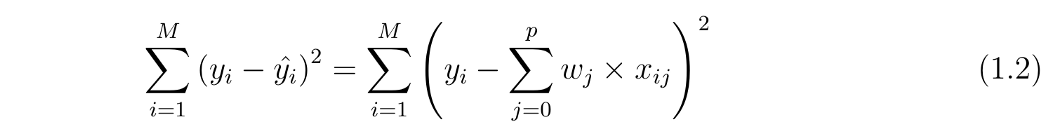

Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting. The chosen linear model can be just right also, if you’re lucky enough! If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-generalization or over-fitting

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

#### Ridge Regression

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.


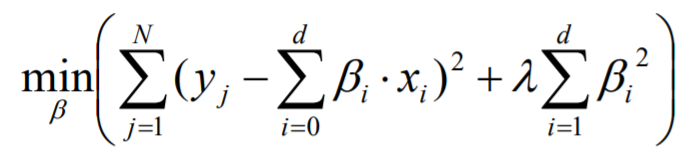

As an extra coefficien is added the cost function increases proportional to the square of the coefficient value

Regularization parameter λ controls the extent of penelization.λ =0 corresponds to Least Squares Regression

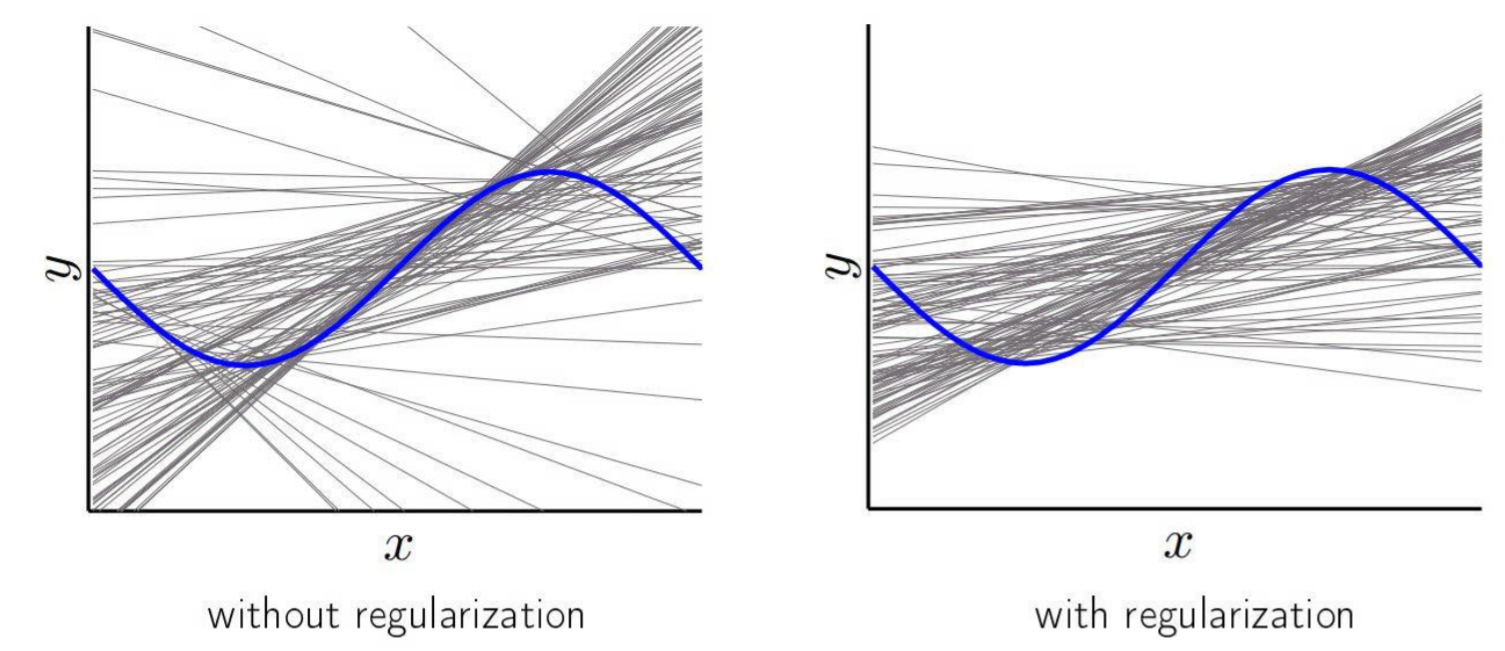

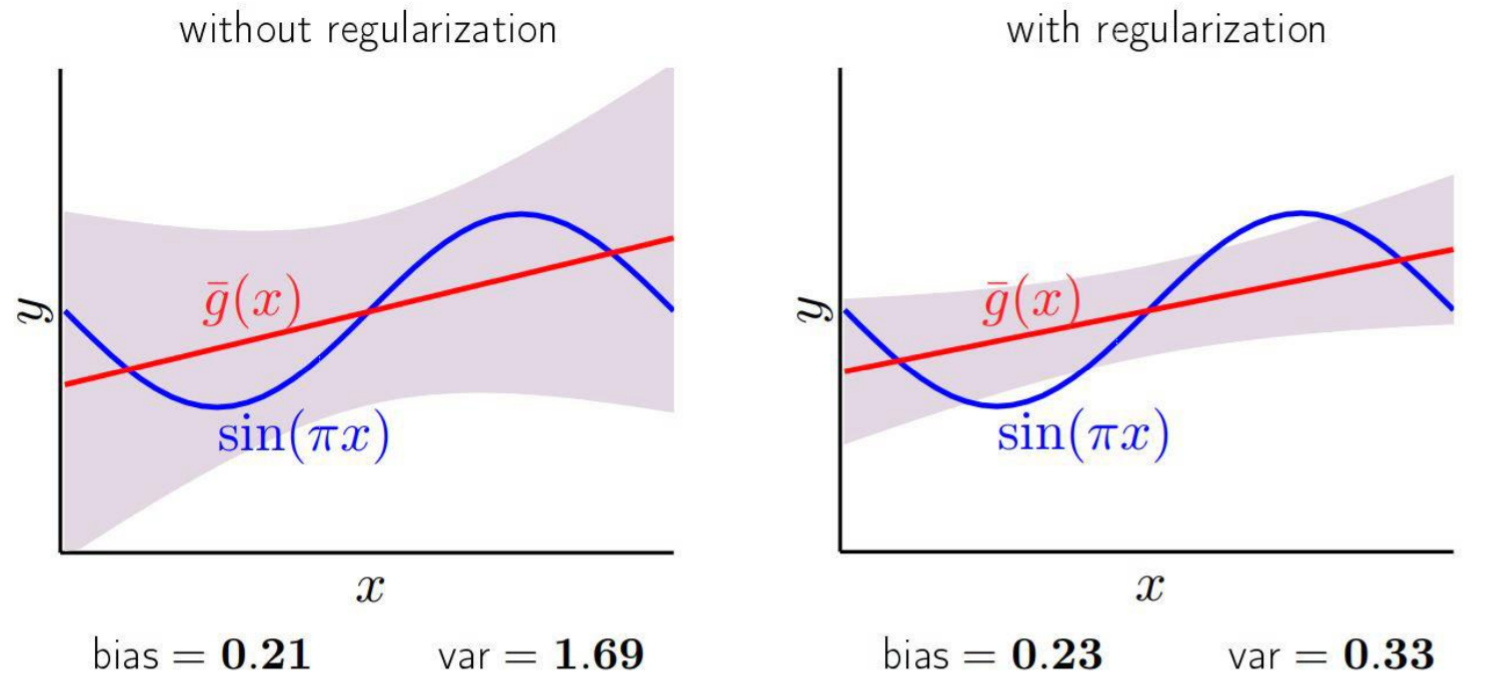

<b> Coefficients </b>

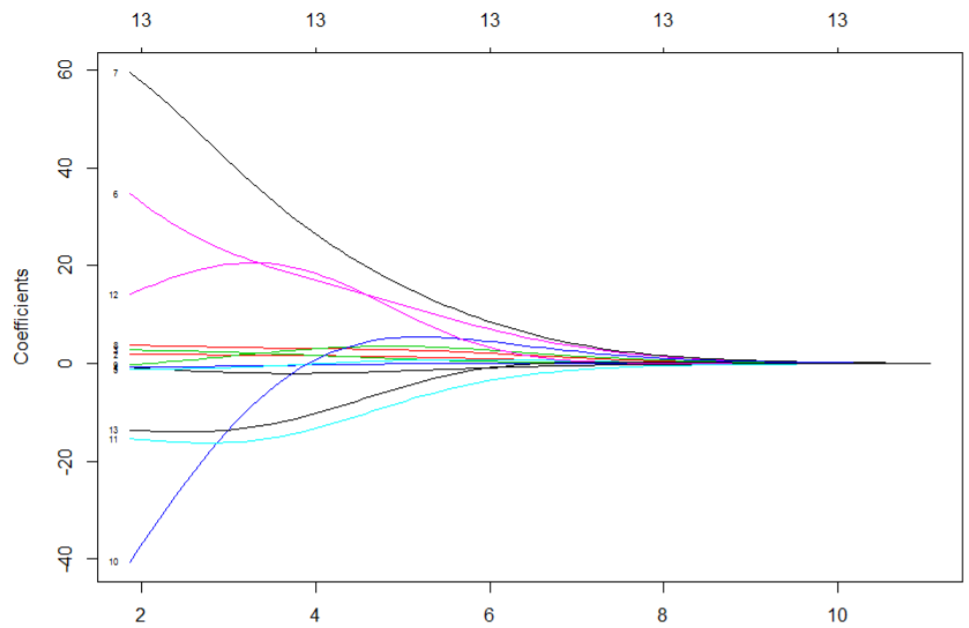

#### Lasso Regularization(Least Absolute Shrinkage and Selection Operator

Penalization of large coefficients through L1
norm 

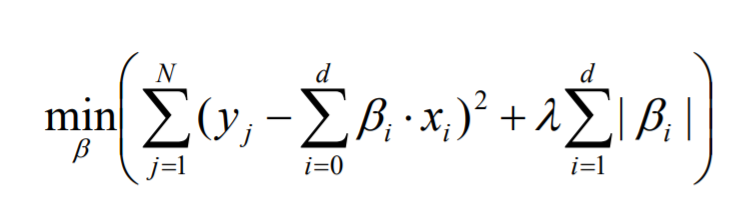

<b> Coefficients </b>

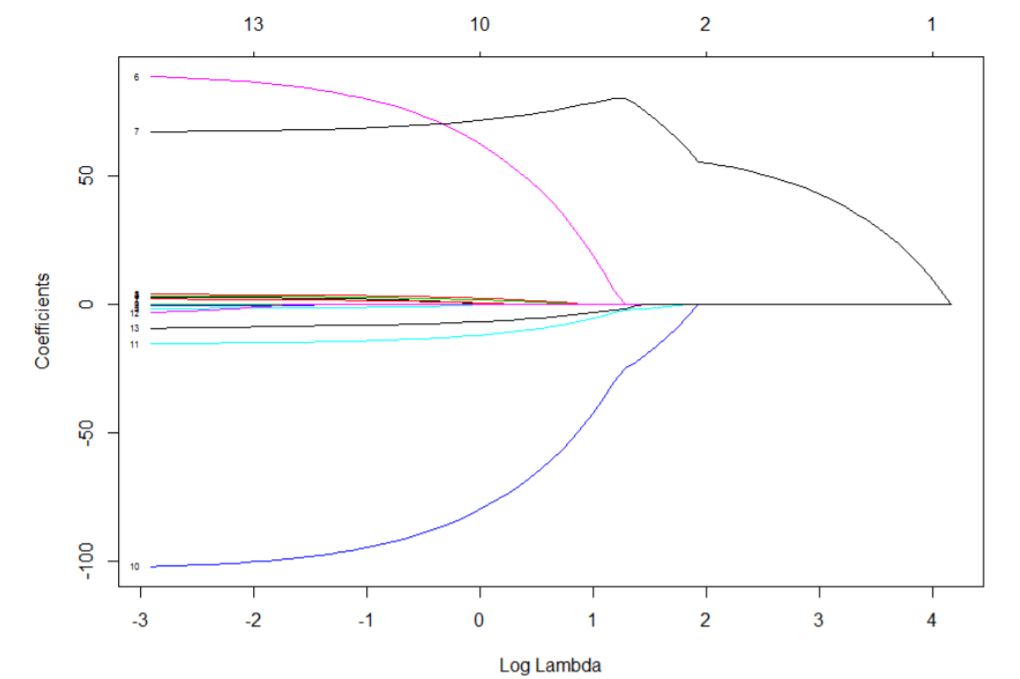

#### Why does Lasso lead to sparsity

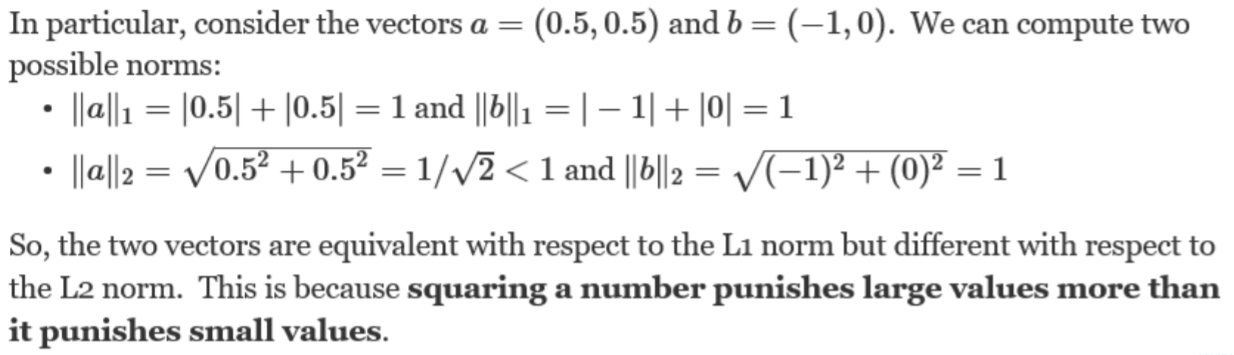

### Ridge Vs Lasso

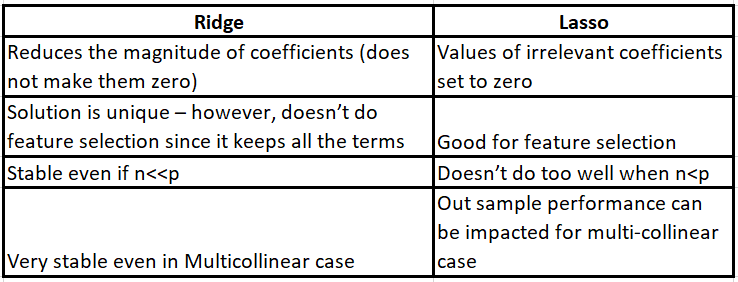

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio λ

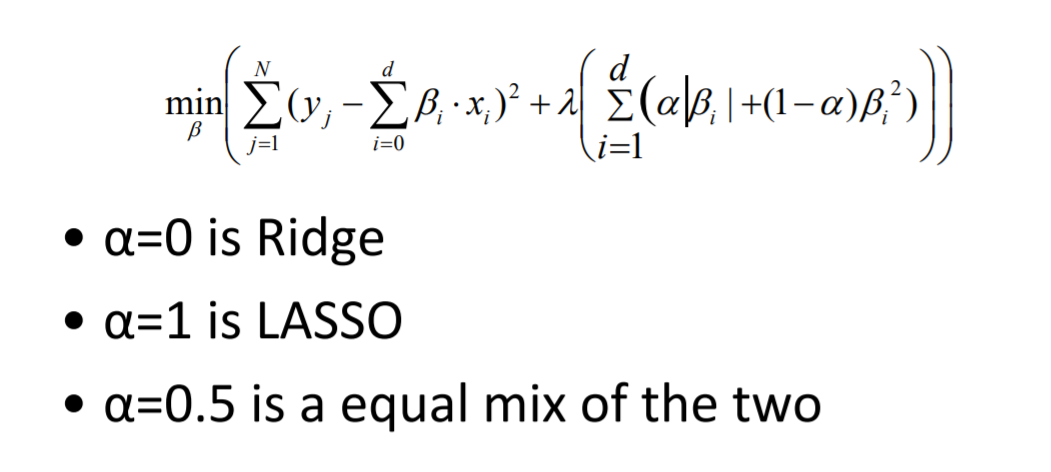

### Final Thoughts

1. Keep in mind that ridge regression can't zero out coefficients; thus,you either end up including all the coefficients in the model, or none of them. 
2. In contrast, the LASSO does both parameter shrinkage and variable selection automatically.
3. If some of your covariates are highly correlated, you may want to lookat the Elastic Net instead of the LASSO.

### Regularization in Python

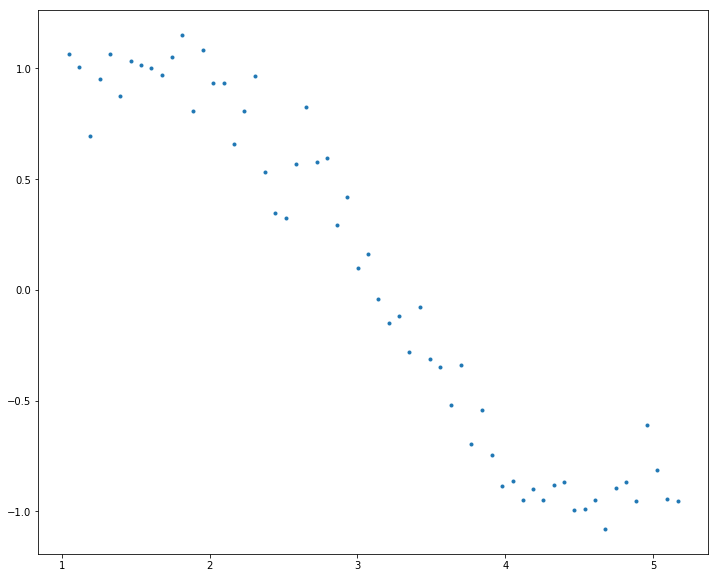

In [74]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [75]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [77]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
#initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

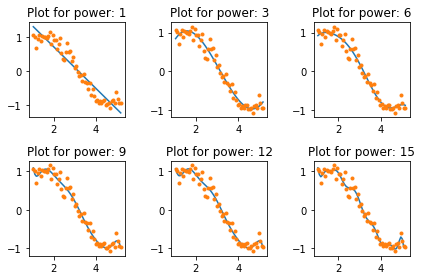

In [78]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

As the model complexity increases, the models tends to fit even smaller deviations in the training data set

In [79]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


<b> Objective</b> :RSS

It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

In [80]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\sgarg133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.493840e-17
  overwrite_a=True).T


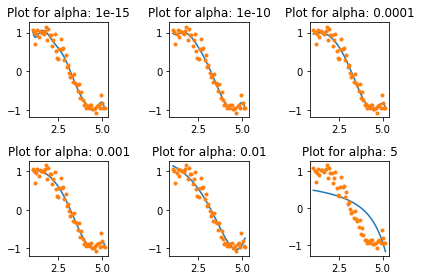

In [81]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

In [82]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,65,0.56,-4.3,0.39,0.2,-0.028,-0.0069,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


<b> Objective </b>:rss+alpha*coeff^2

1. The RSS increases with increase in alpha, this model complexity reduces
2. An alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
3. High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
4. Though the coefficients are very very small, they are NOT zero.

In [89]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [83]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\sgarg133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sgarg133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sgarg133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


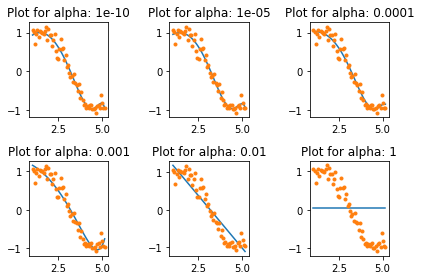

In [86]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

This again tells us that the model complexity decreases with increase in the values of alpha. But notice the straight line at alpha=1. Appears a bit strange to me. Let’s explore this further by looking at the coefficients:

In [87]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


1. For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
2. For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
3. Many of the coefficients are zero even for very small values of alpha

Inferences 1,2 might not generalize always but will hold for many cases. The real difference from ridge is coming out in the last inference. Lets check the number of coefficients which are zero in each model using following code:

In [88]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64